<a href="https://colab.research.google.com/github/shubham14yadav/Starting_Projects/blob/master/geo_hurricane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 1.0MB 22.3MB/s 
     |████████████████████████████████| 15.3MB 261kB/s 
     |████████████████████████████████| 6.6MB 24.6MB/s 


In [5]:
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

In [8]:
country = gpd.read_file("/content/gz_2010_us_040_00_5m.json")

In [9]:
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [11]:
type(country)


geopandas.geoseries.GeoSeries

In [12]:
type(country.geometry)

geopandas.geoseries.GeoSeries

In [13]:
type(country.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

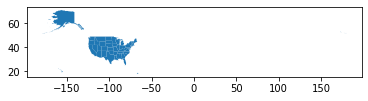

In [14]:
country.plot()

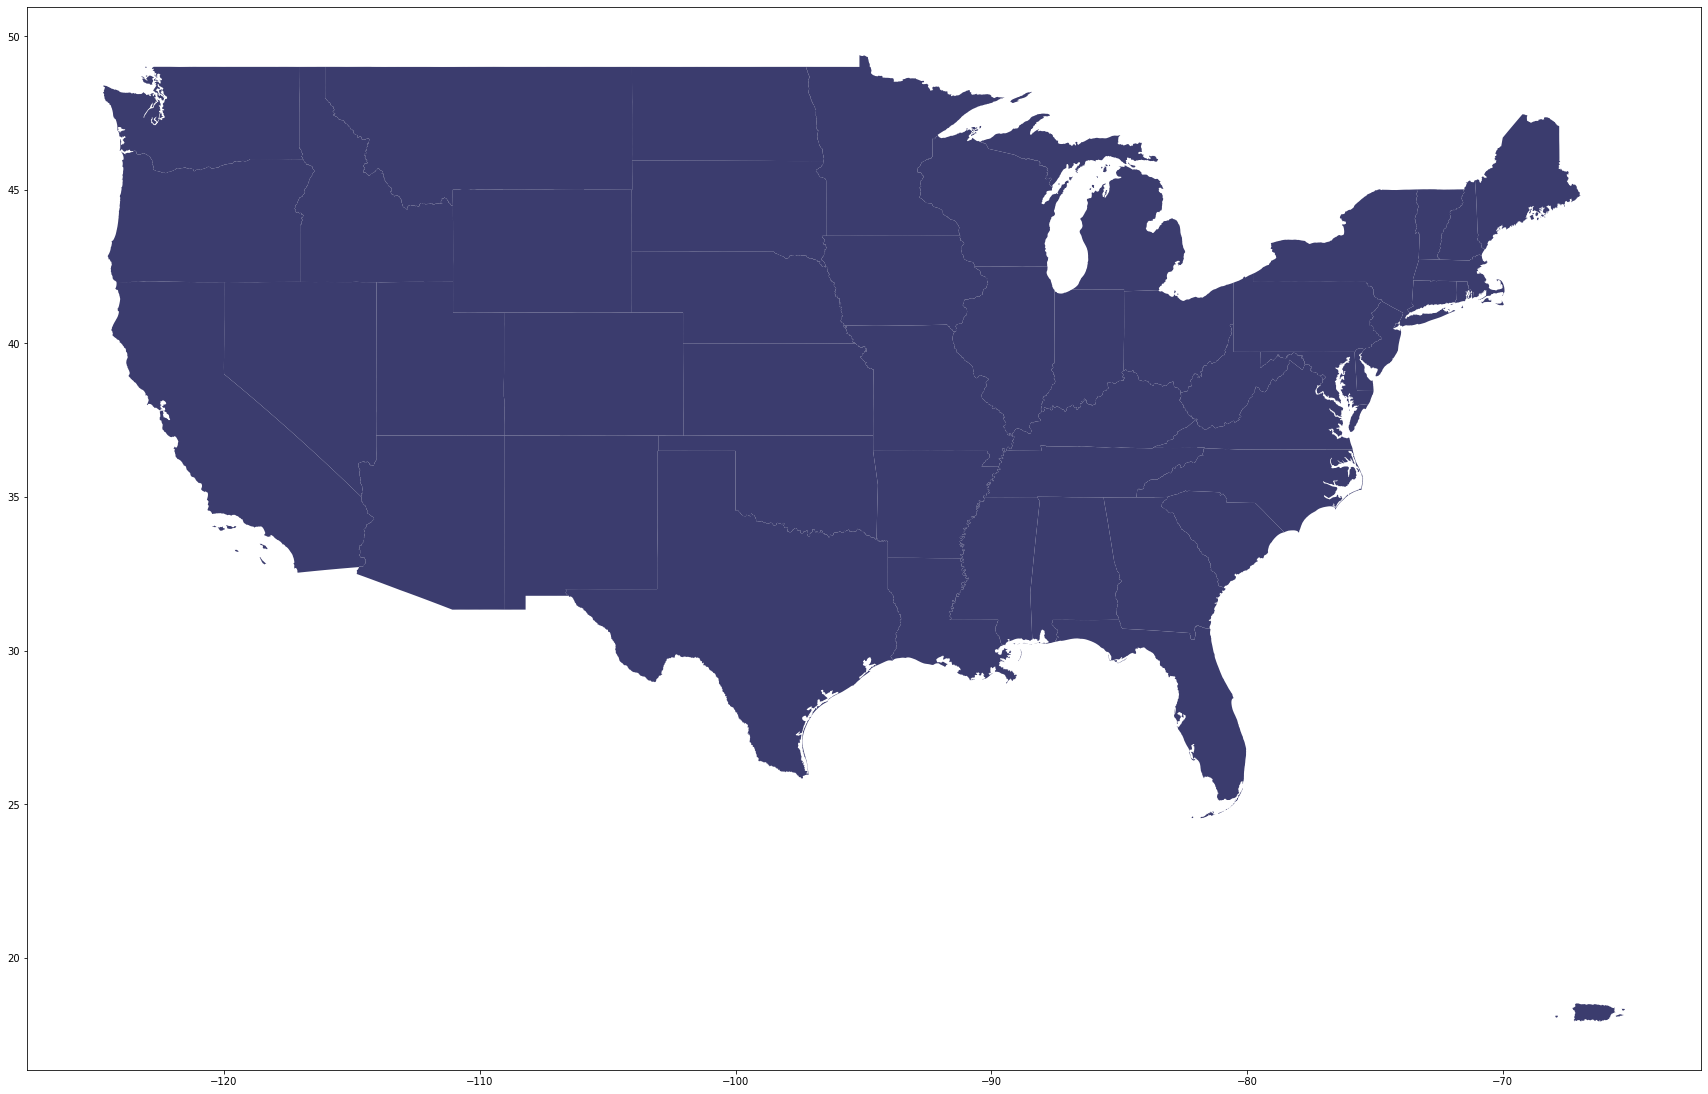

In [15]:
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,20), color='#3B3C6E');

In [16]:
florence = pd.read_csv('/content/florence.csv')

In [19]:
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila
1,1A,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila
2,2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila
3,2A,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven
4,3,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven


In [20]:
florence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AdvisoryNumber  105 non-null    object 
 1   Date            105 non-null    object 
 2   Lat             105 non-null    float64
 3   Long            105 non-null    float64
 4   Wind            105 non-null    int64  
 5   Pres            105 non-null    int64  
 6   Movement        105 non-null    object 
 7   Type            105 non-null    object 
 8   Name            105 non-null    object 
 9   Received        105 non-null    object 
 10  Forecaster      104 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 9.1+ KB


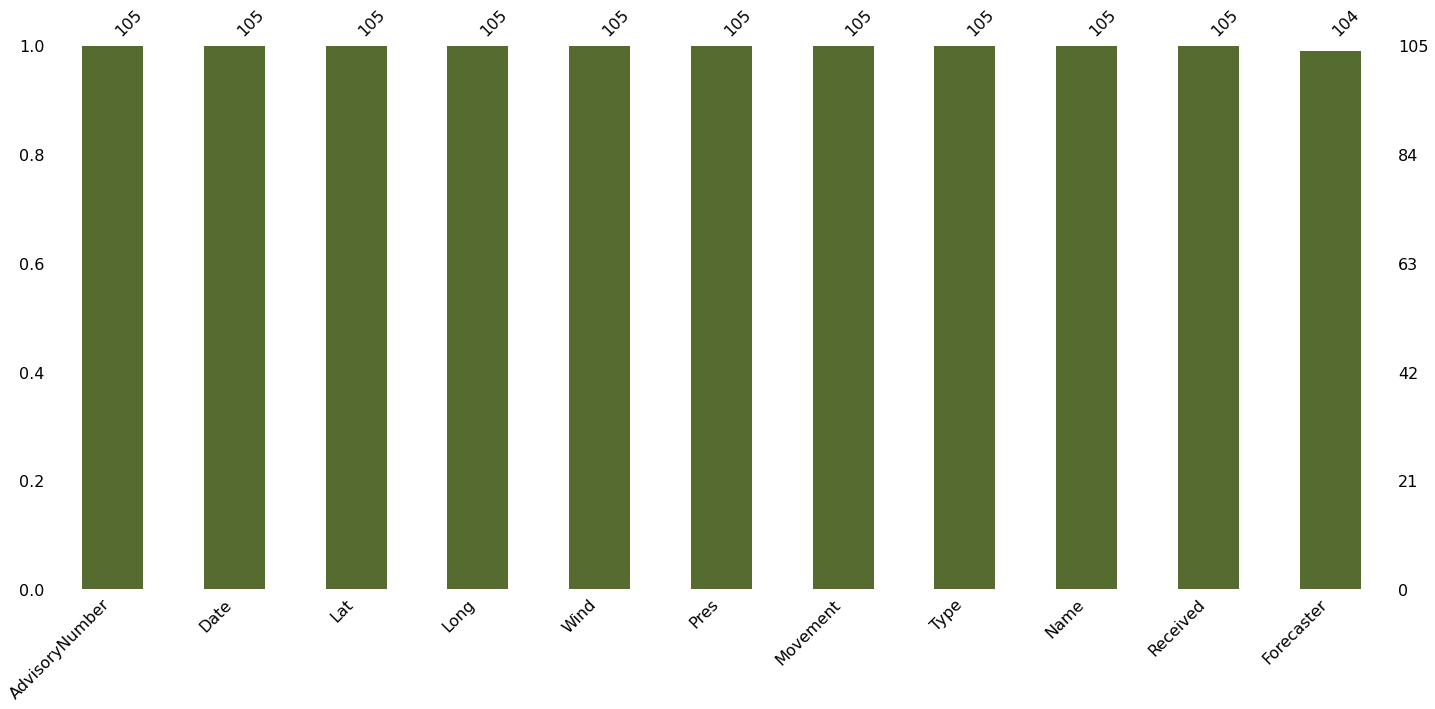

In [21]:
msn.bar(florence, color='darkolivegreen');

In [22]:
florence.describe()

,Lat,Long,Wind,Pres
count,105.000000,105.000000,105.000000,105.000000
mean,25.931429,56.938095,74.428571,981.571429
std,7.975917,20.878865,36.560765,22.780667
min,12.900000,18.400000,25.000000,939.000000
25%,18.900000,41.000000,40.000000,956.000000
50%,25.100000,60.000000,70.000000,989.000000
75%,33.600000,76.400000,105.000000,1002.000000
max,42.600000,82.900000,140.000000,1008.000000


In [23]:
florence = florence.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)

In [24]:
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


In [25]:
florence['Long'] = 0 - florence['Long']

In [26]:
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


In [27]:
florence['coordinates'] = florence[['Long', 'Lat']].values.tolist()

In [28]:
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-18.4, 12.9]"
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.0, 12.9]"
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.4, 12.9]"
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.4, 13.1]"
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.9, 13.2]"


In [29]:
florence['coordinates'] = florence['coordinates'].apply(Point)

In [30]:
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)


In [31]:
type(florence)

pandas.core.frame.DataFrame

In [32]:
type(florence['coordinates'])

pandas.core.series.Series

In [35]:
florence = gpd.GeoDataFrame(florence, geometry='coordinates')

In [36]:
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.40000 12.90000)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.00000 12.90000)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.40000 12.90000)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.40000 13.10000)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.90000 13.20000)


In [37]:
type(florence)

geopandas.geodataframe.GeoDataFrame

In [38]:
type(florence['coordinates'])

geopandas.geoseries.GeoSeries

In [39]:
florence[florence['Name']=='Six']

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.40000 12.90000)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.00000 12.90000)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.40000 12.90000)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.40000 13.10000)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.90000 13.20000)
5,08/31/2018 02:00,13.4,-21.2,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-21.20000 13.40000)
6,08/31/2018 05:00,13.6,-21.4,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.40000 13.60000)
7,08/31/2018 08:00,13.7,-21.8,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.80000 13.70000)
8,08/31/2018 11:00,13.7,-22.7,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-22.70000 13.70000)
9,08/31/2018 14:00,13.8,-23.3,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-23.30000 13.80000)


In [40]:
florence.groupby('Name').Type.count()

Name
FLORENCE     6
Florence    85
SIX          4
Six         10
Name: Type, dtype: int64

In [41]:
print("Mean wind speed of Hurricane Florence is {} mph and it can go up to {} mph maximum".format(round(florence.Wind.mean(),4),
                                                                                         florence.Wind.max()))

Mean wind speed of Hurricane Florence is 74.4286 mph and it can go up to 140 mph maximum


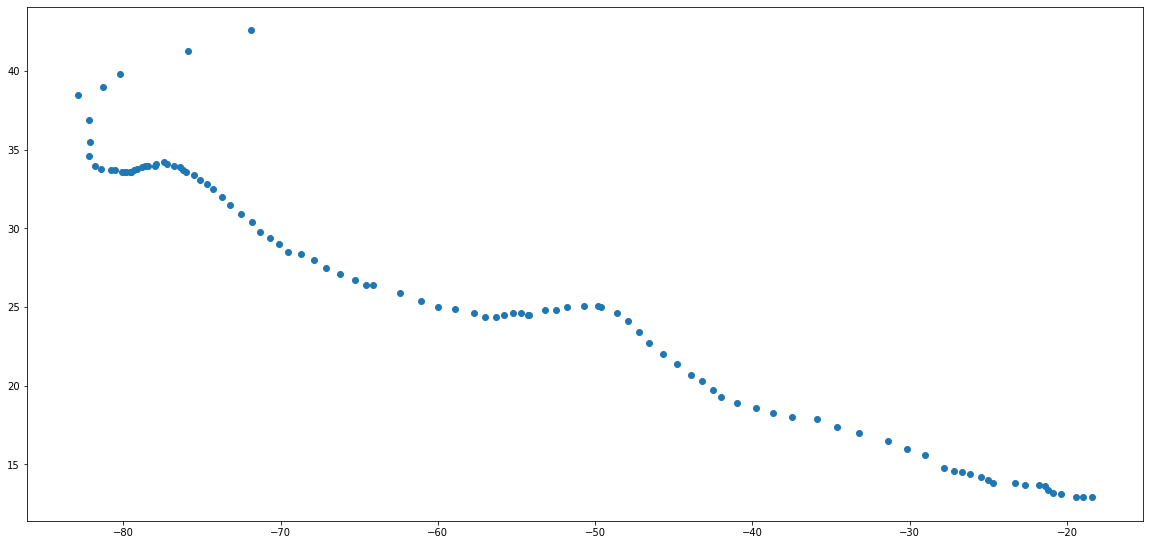

In [42]:
#Visualization
florence.plot(figsize=(20,10));

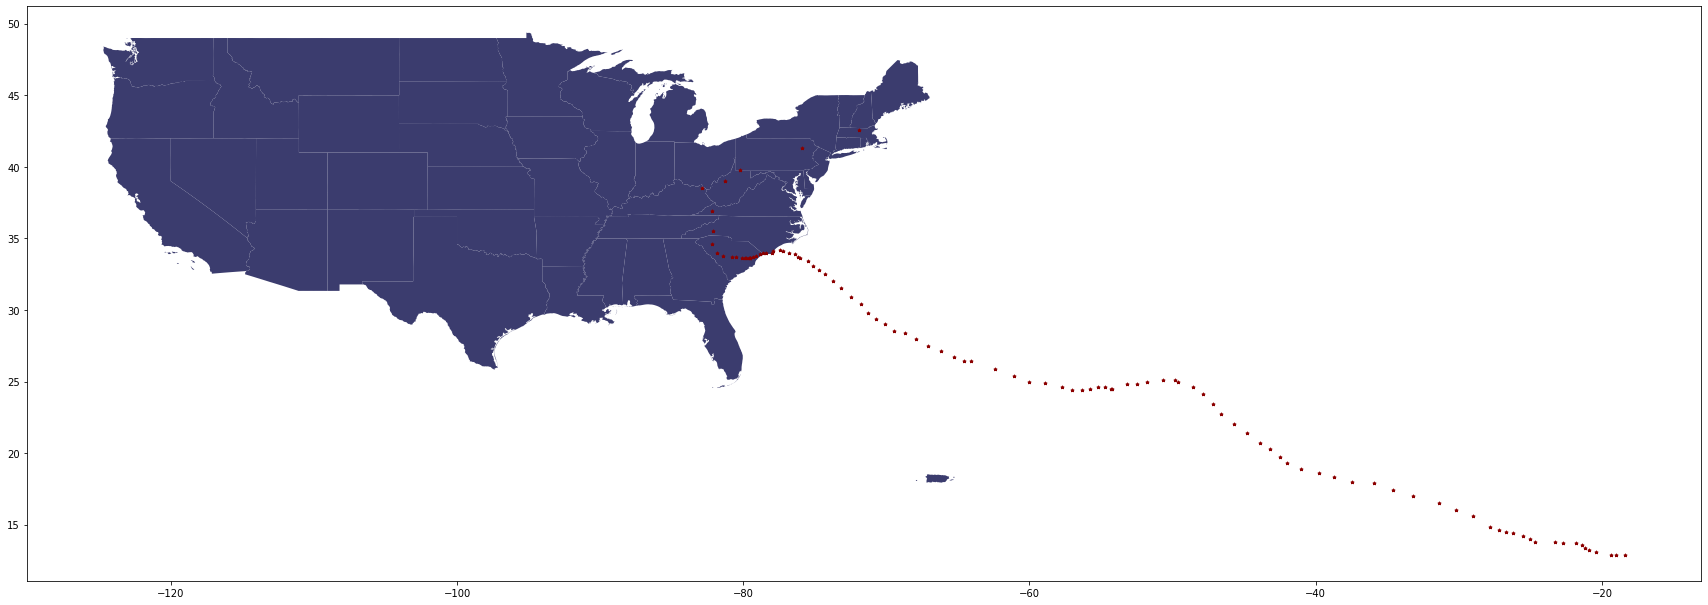

In [45]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')
florence.plot(ax=base, color='darkred', marker="*", markersize=10);

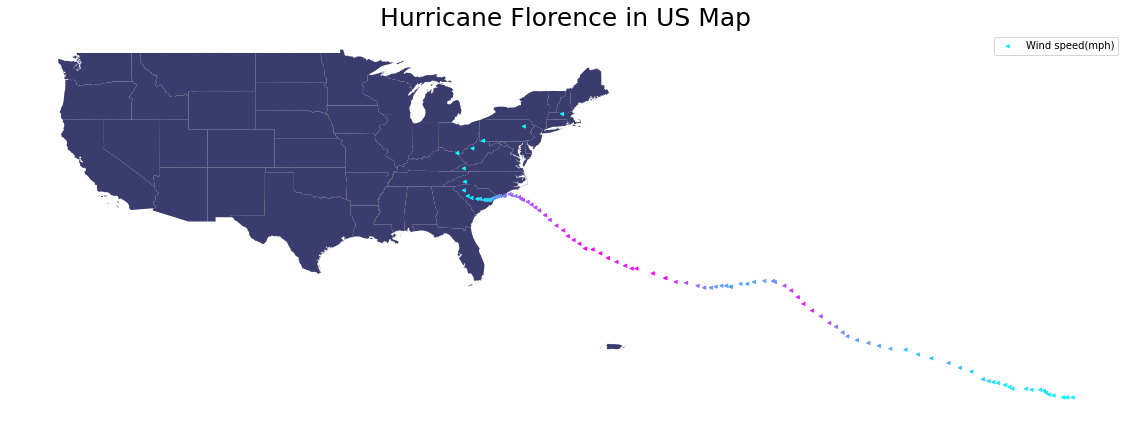

In [46]:
fig, ax = plt.subplots(1, figsize=(20,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')
florence.plot(ax=base, column='Wind', marker="<", markersize=10, cmap='cool', label="Wind speed(mph)")
_ = ax.axis('off')
plt.legend()
ax.set_title("Hurricane Florence in US Map", fontsize=25)
plt.savefig('Hurricane_footage.png',bbox_inches='tight');